In [1]:
import numpy as np
import pandas as pd

---
# Import data

In [2]:
dataset = pd.read_csv('SP-280-Leste.csv', sep=',',header=None)
dataset.head()

,0,1,2,3
0,1,01/09/2011 00:00,37,89.0
1,2,01/09/2011 00:05,48,82.0
2,3,01/09/2011 00:10,26,85.0
3,4,01/09/2011 00:15,47,81.0
4,5,01/09/2011 00:20,52,82.0


## Clean and organize dataset

+ ### Organize the dataset

    Organize the columns, remove some not useful data, rename the columns and convert each column to your correct unit.

+ ### Date-time columns

    Working with date-time date requires to change the index DataFrame to the column that contain Date-Time values


In [3]:
'''Organize'''
# Drop the column '0'
dataset = dataset.drop(columns=0)

# Rename columns
dataset = dataset.rename(columns={0:"ID", 1:"Date-Time",2:"Flow[veh/h.lane]", 3:"Speed[km/h]" })

# Calculate the Flow rate
dataset["Flow[veh/h.lane]"] = dataset["Flow[veh/h.lane]"] * 60 / 5 / 2 # two lanes

# Calculate the Density
dataset["Density[veh/km.lane]"] = dataset["Flow[veh/h.lane]"] / dataset['Speed[km/h]']

# Convert to Datetime
dataset['Date-Time'] = pd.to_datetime(dataset['Date-Time'], format='%d/%m/%Y %H:%M')

'''Date-time column index'''
dataset.set_index('Date-Time',inplace=True)
dataset.head()

,Flow[veh/h.lane],Speed[km/h],Density[veh/km.lane]
Date-Time,,,
2011-09-01 00:00:00,222.0,89.0,2.494382
2011-09-01 00:05:00,288.0,82.0,3.512195
2011-09-01 00:10:00,156.0,85.0,1.835294
2011-09-01 00:15:00,282.0,81.0,3.481481
2011-09-01 00:20:00,312.0,82.0,3.804878


+ ### Missing values

    Verifying some missing values in dataset


In [4]:
dataset.isna().sum()

Flow[veh/h.lane]         0
Speed[km/h]              1
Density[veh/km.lane]    39
dtype: int64

In [5]:
dataset = dataset.fillna(0.0)
dataset.isna().sum()

Flow[veh/h.lane]        0
Speed[km/h]             0
Density[veh/km.lane]    0
dtype: int64

---
# Plotting

## Plotting 2D with Pandas
+ The examples followed the tutorial on [Our Coding Club](https://ourcodingclub.github.io/2019/01/07/pandas-time-series.html)

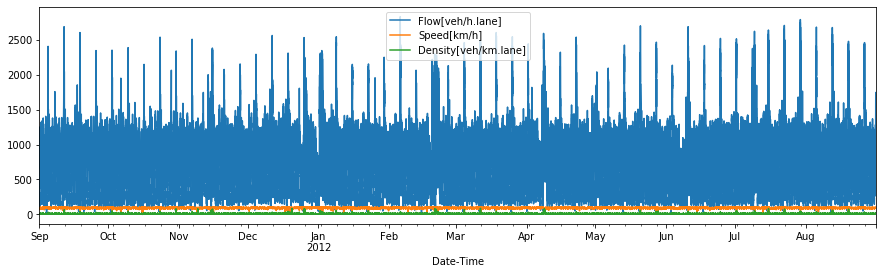

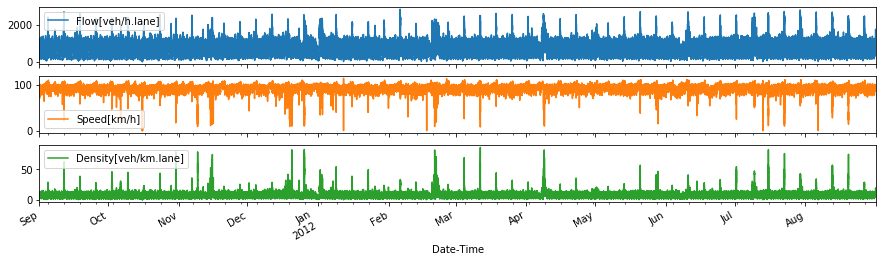

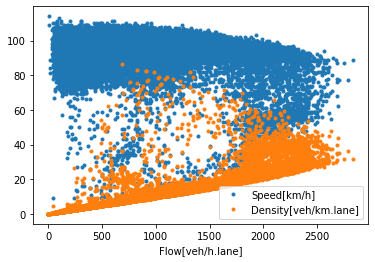

In [7]:
#Plot everythin in the same graph
dataset.plot(figsize=(15,4))

# Plot each variable in a different graph but all sharing the x axis
dataset.plot(subplots=True, figsize=(15,4))

# Plotting two variables against one of the others
dataset.plot(x='Flow[veh/h.lane]', y=['Speed[km/h]', 'Density[veh/km.lane]'], style='.')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000241278B2DC0>,
      dtype=object)

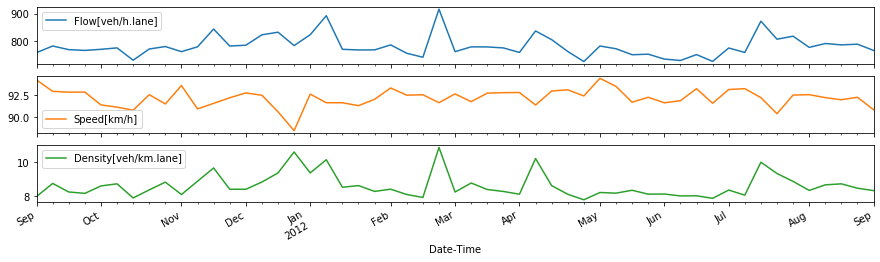

In [17]:
# Plotting aggregating data with 'resample' function
dataset.resample('W').mean().plot(subplots=True,figsize=(15,4))

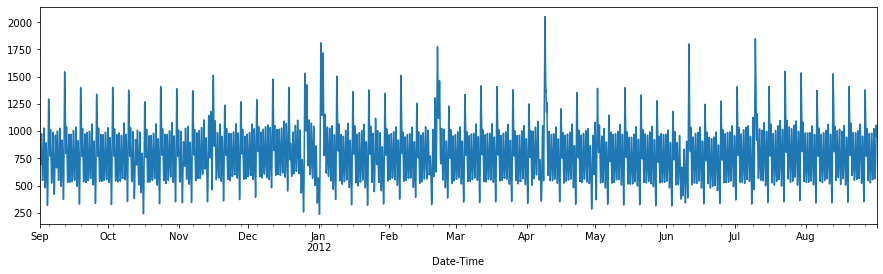

In [9]:
# Using a window 'rolling' by data - like a moving mean
dataset['Flow[veh/h.lane]'].rolling(24*7).mean().plot(figsize=(15,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002412A9BF400>,
      dtype=object)

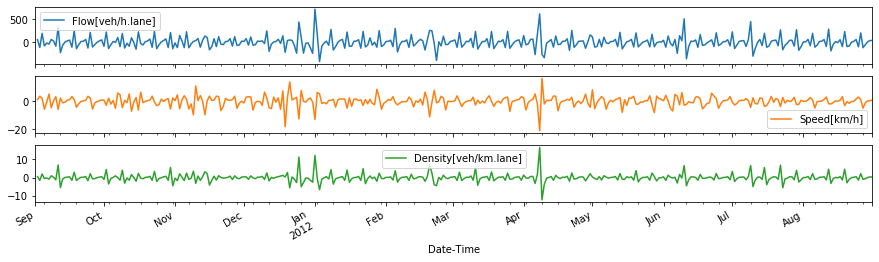

In [10]:
# Plotting the difference with relation to the mean of each variable
dataset.resample('D').mean().diff().plot(figsize=(15,4), subplots=True)

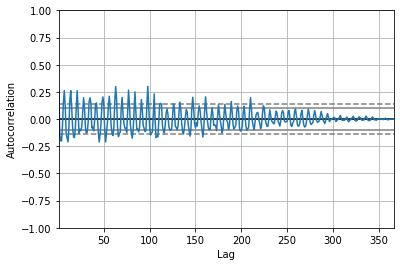

In [11]:
# Identifying periodicity and correlation
pd.plotting.autocorrelation_plot(dataset['Speed[km/h]'].resample('D').mean())

## Plotting 3D
+ The examples were coded in [machineLearningmastery](https://machinelearningmastery.com/time-series-data-visualization-with-python/)

In [94]:
import matplotlib.pyplot as plt

In [12]:
groups = dataset.resample('D')

In [13]:
len(groups)

366

In [109]:
#varname = 'Flow[veh/h.lane]'
varname = 'Speed[km/h]'
#varname = 'Density[veh/km.lane]'
days = pd.DataFrame()
for name, group in groups:
    days[name] = group[varname].values

#days.T

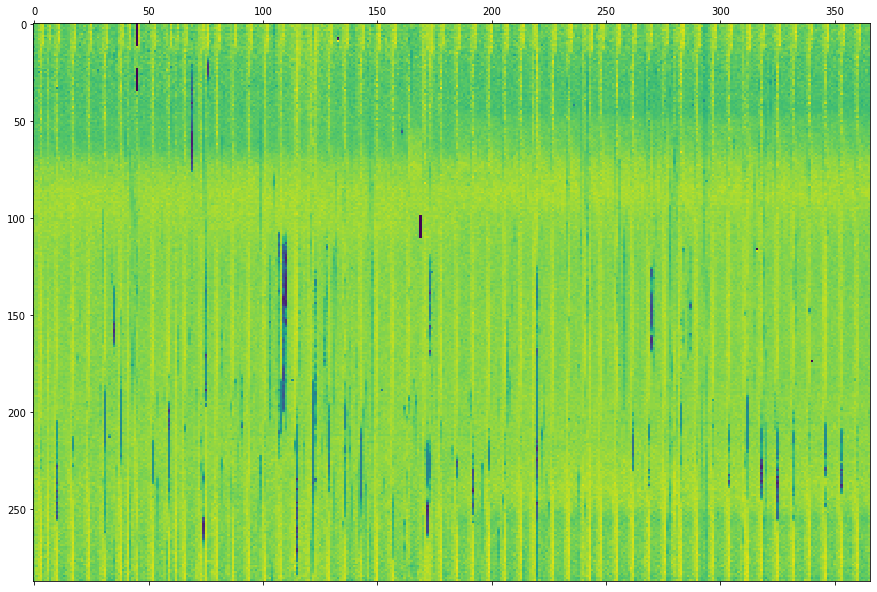

In [110]:
plt.figure(figsize=(15,10))
plt.matshow(days, interpolation=None, aspect='auto', fignum=1)
plt.show()

In [111]:
days

,2011-09-01,2011-09-02,2011-09-03,2011-09-04,2011-09-05,2011-09-06,2011-09-07,2011-09-08,2011-09-09,2011-09-10,...,2012-08-22,2012-08-23,2012-08-24,2012-08-25,2012-08-26,2012-08-27,2012-08-28,2012-08-29,2012-08-30,2012-08-31
0,89.0,85.0,90.0,103.0,102.0,86.0,91.0,92.0,89.0,94.0,...,89.0,86.0,83.0,97.0,94.0,104.0,85.0,88.0,89.0,87.0
1,82.0,86.0,95.0,101.0,106.0,80.0,96.0,105.0,86.0,90.0,...,83.0,86.0,90.0,93.0,96.0,101.0,81.0,85.0,85.0,87.0
2,85.0,88.0,92.0,102.0,103.0,90.0,89.0,98.0,90.0,90.0,...,85.0,89.0,80.0,94.0,92.0,105.0,87.0,84.0,90.0,92.0
3,81.0,89.0,98.0,102.0,102.0,84.0,94.0,100.0,78.0,91.0,...,87.0,82.0,88.0,94.0,100.0,107.0,86.0,87.0,92.0,89.0
4,82.0,84.0,89.0,91.0,101.0,79.0,87.0,96.0,81.0,84.0,...,84.0,87.0,85.0,86.0,102.0,105.0,87.0,85.0,87.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,88.0,98.0,98.0,105.0,85.0,95.0,100.0,87.0,93.0,101.0,...,90.0,84.0,94.0,91.0,101.0,91.0,81.0,84.0,89.0,91.0
284,86.0,100.0,103.0,104.0,91.0,95.0,99.0,87.0,93.0,102.0,...,87.0,90.0,98.0,93.0,105.0,84.0,87.0,87.0,85.0,94.0
285,94.0,90.0,99.0,106.0,91.0,94.0,95.0,88.0,93.0,100.0,...,82.0,87.0,93.0,99.0,103.0,83.0,88.0,87.0,88.0,90.0
286,86.0,97.0,103.0,104.0,91.0,90.0,100.0,85.0,98.0,99.0,...,83.0,85.0,90.0,96.0,101.0,86.0,79.0,83.0,85.0,86.0


In [112]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

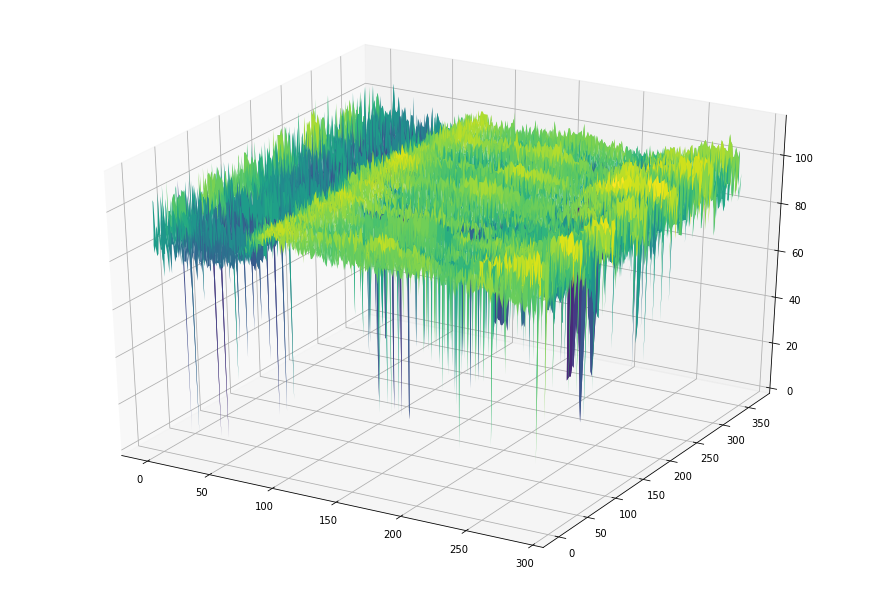

In [113]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

x = days.index.values
y = np.arange(366) #days.columns.values
X,Y = np.meshgrid(x,y)
Z = days.T.values

ax.plot_surface(X, Y, Z, cmap=cm.viridis)

plt.show()

+ Plotting the surface of variables, without time

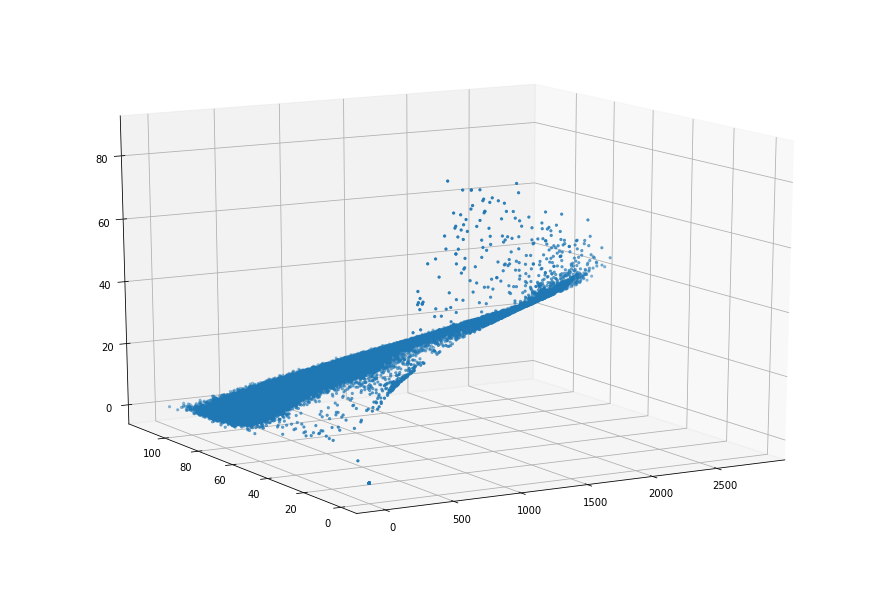

In [141]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.view_init(15,-120)

ax.scatter(dataset['Flow[veh/h.lane]'], dataset['Speed[km/h]'], dataset['Density[veh/km.lane]'], s=5)